WALMART DATA ANALYSIS

Task is to analyze the sales of walmart with the data given (eg: analysing weekly sales,which store or department sells etc.

DATA ANALYSIS AND VISUALIZATION

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
train_df=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Data Science\train.csv')
test_df=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Data Science\test.csv')
features_df=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Data Science\features.csv')
stores_df=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Data Science\stores.csv')

In [3]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [6]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [7]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [9]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [10]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [11]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [16]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [17]:
dataset_m=features_df.merge(stores_df,how='inner',on='Store')

In [18]:
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [19]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [20]:
#Datetime type 
#converting the date to date time 
from datetime import datetime 

In [21]:
dataset_m['Date']=pd.to_datetime(dataset_m['Date'])

In [22]:
train_df['Date']=pd.to_datetime(train_df['Date'])

In [23]:
test_df['Date']=pd.to_datetime(test_df['Date'])

In [24]:
dataset_m['week']=dataset_m.Date.dt.isocalendar().week

In [25]:
dataset_m['year']=dataset_m.Date.dt.isocalendar().year

In [26]:
dataset_m.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


'''Creating a new df by merging (inner) the train_df and the new dataframe dataset_m on store,data and isholiday columns and 
sorting the values by store,department and date.'''

In [27]:
train_df_1=train_df.merge(dataset_m,how='inner',on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [28]:
train_df_1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,39,2012
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,40,2012
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,41,2012
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,42,2012


In [29]:
#VISUALISATION

1) SACTTER PLOT

In [30]:
def scatter(train_df_1,column):
#plot the figure
    plt.figure()
#plot the scatter plot with data from the specified column in x-axis & weekkly sales in y axis
    plt.scatter(train_df[column],train_df_1['Weekly_Sales'])
#give y label as weekly sales 
    plt.ylabels('Weekly_Sales')
#give x labels as the column specified as parameter in the fuction 
    plt.xlabels(column)
#plot a scatter plot using the scatter function a scatter plot of weekly sales with respect to store 
    scatter(train_df_1,'Store')
#Store for department as well 
    scatter(train_df_1,'Department') 

2) Line plots for weekly sales for each year

In [31]:
#Filtering out mean weekly sales for the year 2010
weekly_sales_2010=train_df_1[train_df_1['year']==2010]['Weekly_Sales'].groupby(train_df_1['week']).mean()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

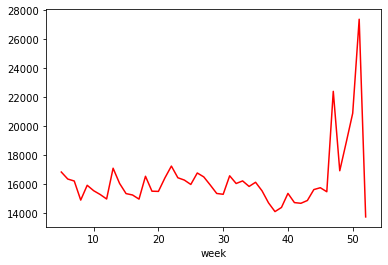

In [32]:
#Plot a line plot with week on x-axis and sales for that particular week of the filtered year in y-axis
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='red')

In [33]:
#Filtering out mean weekly sales for the year 2011
weekly_sales_2011=train_df_1[train_df_1['year']==2011]['Weekly_Sales'].groupby(train_df_1['week']).mean()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

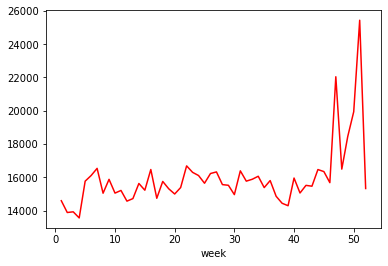

In [34]:
#Plot a line plot with week on x-axis and sales for that particular week of the filtered year in y-axis
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='red')

In [35]:
#Filtering out mean weekly sales for the year 2012
weekly_sales_2012=train_df_1[train_df_1['year']==2012]['Weekly_Sales'].groupby(train_df_1['week']).mean()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

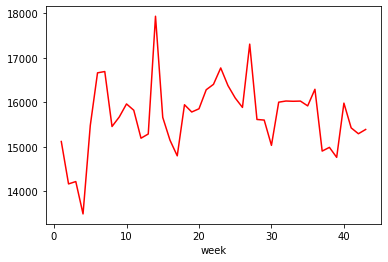

In [36]:
#Plot a line plot with week on x-axis and sales for that particular week of the filtered year in y-axis
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='red')

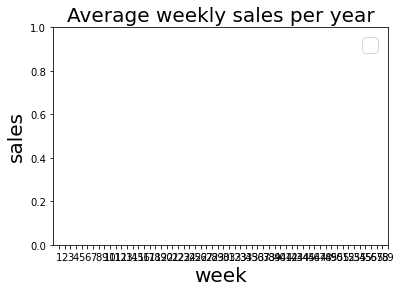

In [37]:
#Plot labels and legends
plt.xticks(np.arange(1,60,step=1))
plt.title('Average weekly sales per year',fontsize=20)
plt.xlabel('week',fontsize=20)
plt.ylabel('sales',fontsize=20)
plt.legend(['2010','2011','2012'],fontsize=20)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

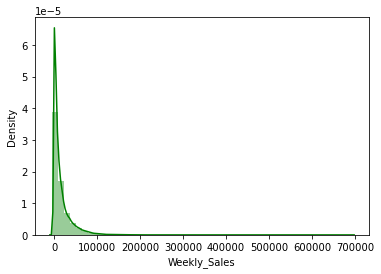

In [38]:
#4) Histogram
sns.distplot(train_df_1['Weekly_Sales'],color='g')

In [39]:
#kurtosis is a measure of whether a data is heavvy_tailed or light_tailed relative to normal distribution 
train_df_1['Weekly_Sales'].kurt()

21.49128990832619

Bar chart on Dataframe 

In [40]:
weekly_sales_store=train_df_1['Weekly_Sales'].groupby(train_df_1['Store']).mean()

In [41]:
weekly_sales_store.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [42]:
weekly_sales_store_df=pd.DataFrame(weekly_sales_store)

In [43]:
weekly_sales_store_df.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=98,color='#FFD200')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


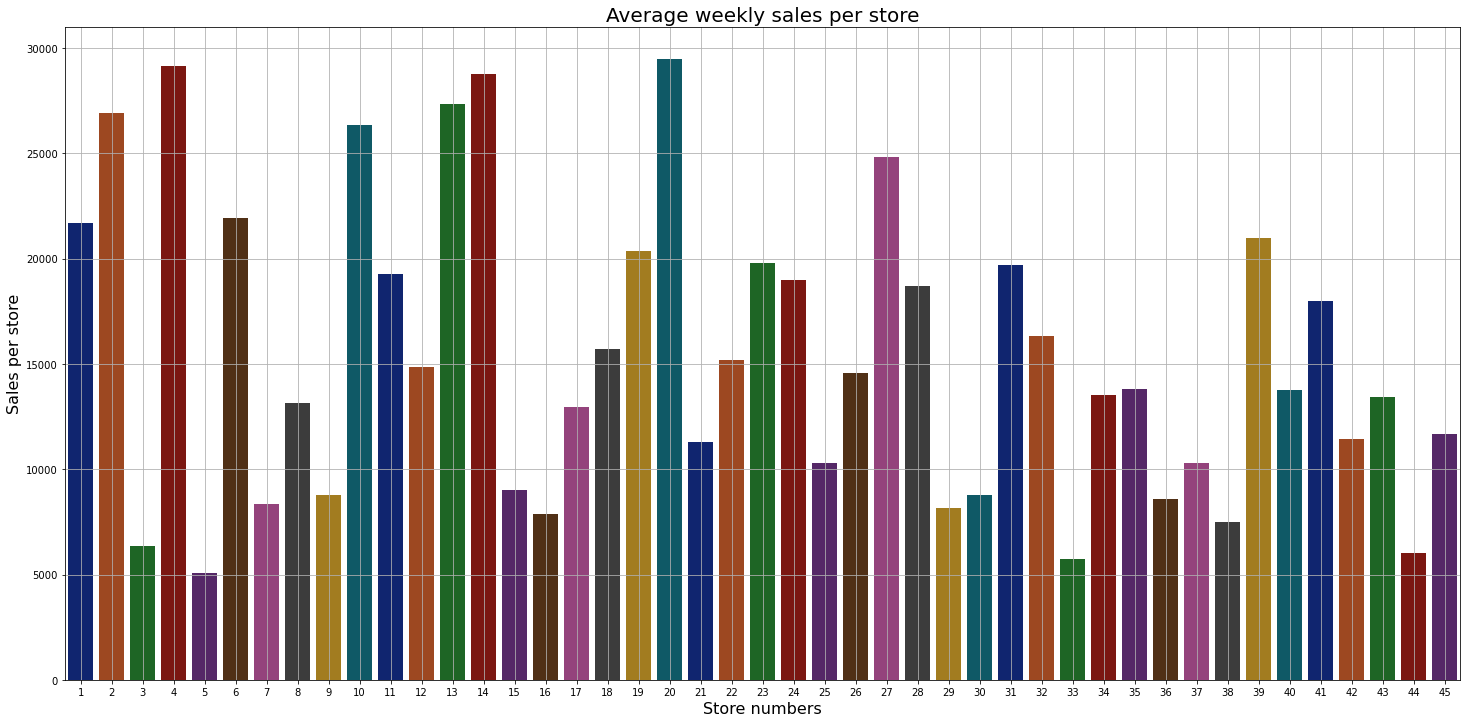

In [46]:
#Plotting a bar graph with store numbers as x values and mean weekly sales for that store as y values 
#Plotting the figure 
plt.figure(figsize=(25,12))
#Create a bar plot with stores in x axis and mean weekly sales as y value
sns.barplot(weekly_sales_store.index,weekly_sales_store.values,palette='dark')
plt.grid()
plt.title('Average weekly sales per store',fontsize=20)
plt.xlabel('Store numbers',fontsize=16)
plt.ylabel('Sales per store',fontsize=16)
plt.show()

In [47]:
#Grouping the train_df_1 by department and computing the mean of weekly_sales for each dept.

In [53]:
weekly_sales_dept=train_df_1['Weekly_Sales'].groupby(train_df_1['Dept']).mean()
weekly_sales_dept_df=pd.DataFrame(weekly_sales_dept)
weekly_sales_dept_df

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [54]:
#Sorting the dataframe with respect to weekly sales in descending order 
weekly_sales_dept_df.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


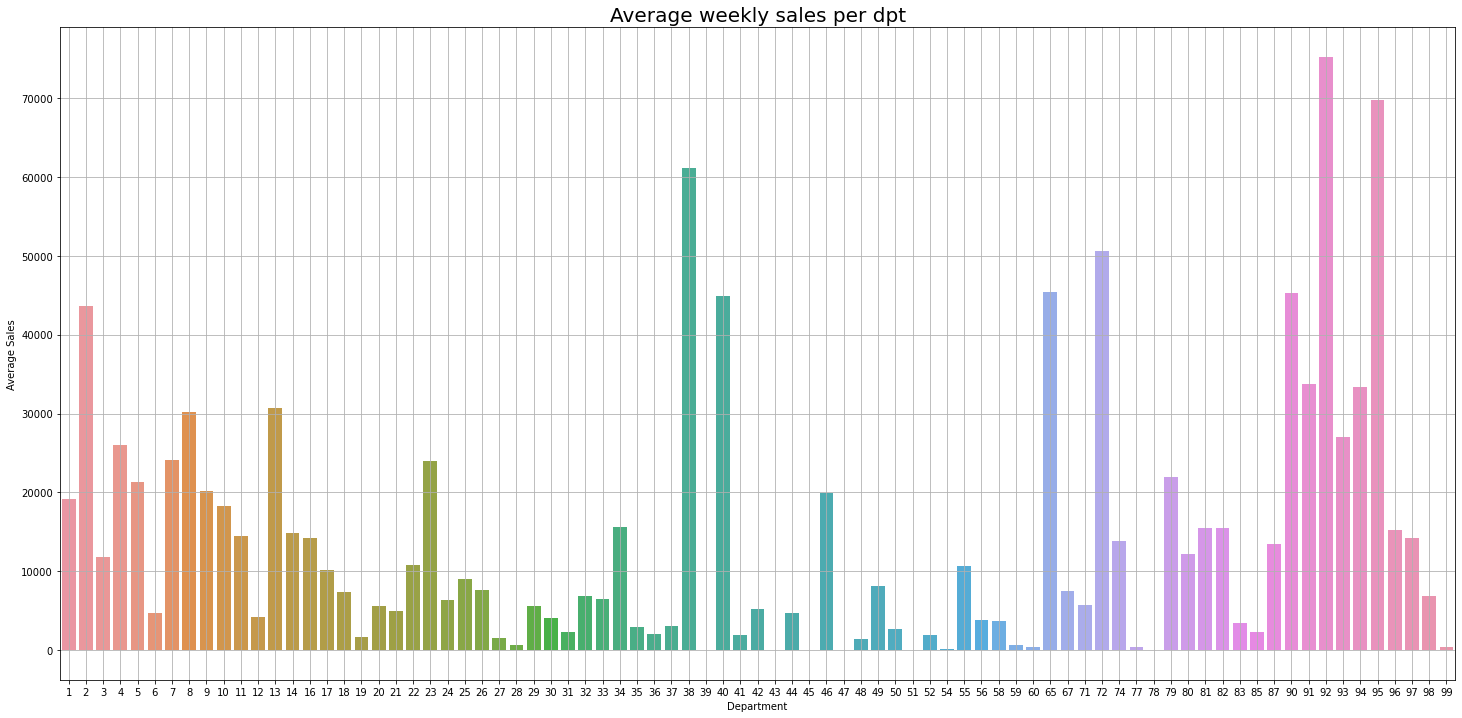

In [57]:
#Plot a bargraph
plt.figure(figsize=(25,12))
#Create a barplot with dept. in x-axis and mean weekly sales for each store as y values
sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values)
plt.grid()
plt.title('Average weekly sales per dpt',fontsize=20)
plt.xlabel('Department')
plt.ylabel('Average Sales')
plt.show()

In [60]:
#Plotting the normal distribution where sales is greater than zero
train_sales=train_df_1[train_df_1['Weekly_Sales']>0]

In [63]:
train_less_than_zero=train_df_1[train_df_1['Weekly_Sales']<=0]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

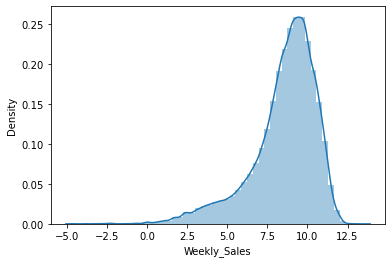

In [69]:
#Take natural log of data for sales more than zero
salesgreaterthanzero=np.log(train_sales['Weekly_Sales'])
sns.distplot(salesgreaterthanzero)

<AxesSubplot:>

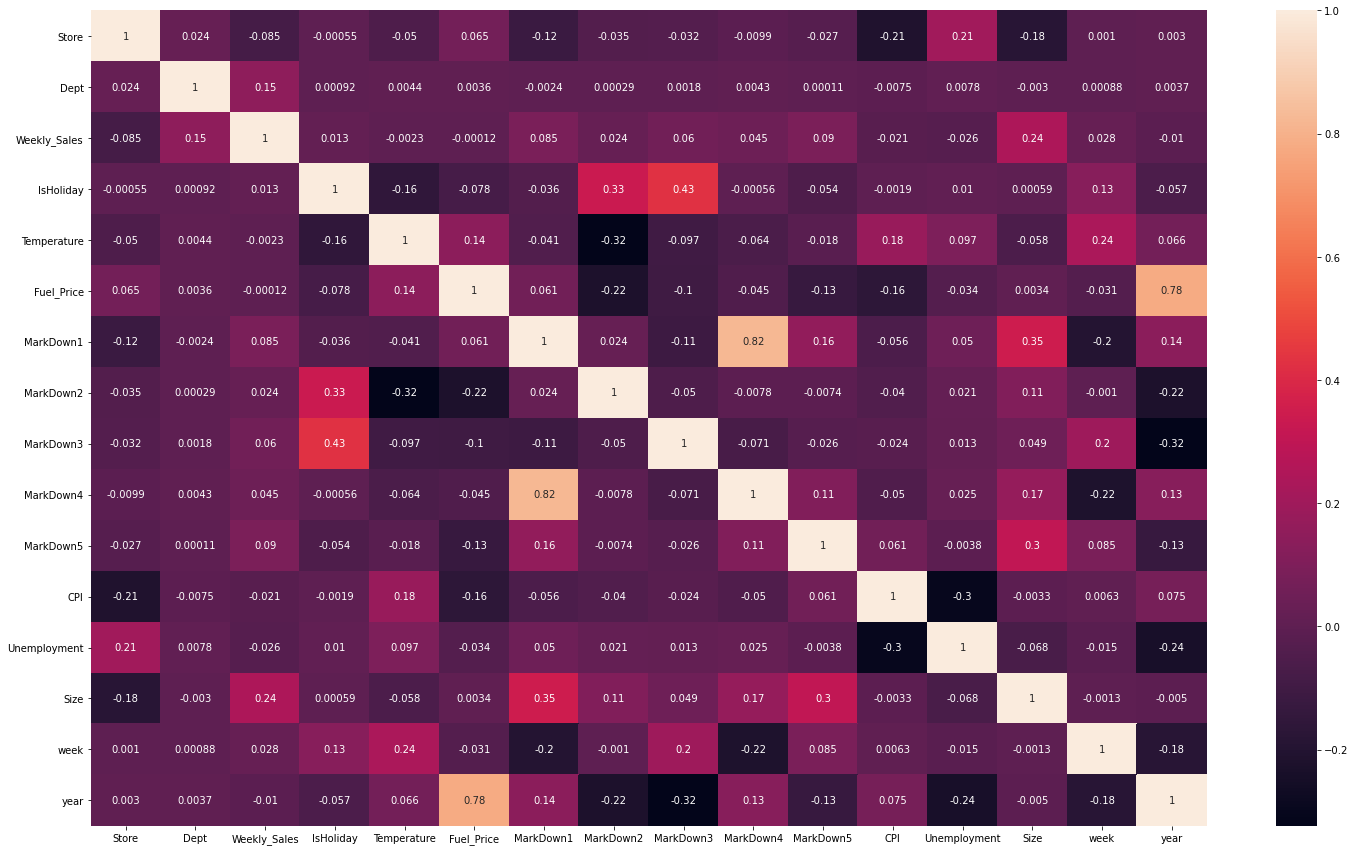

In [70]:
##Heatmap 
plt.figure(figsize=(25,15))
sns.heatmap(train_df_1.corr(),annot=True)